<a href="https://colab.research.google.com/github/biaraujof99/Machine-Learning-/blob/main/1_%09PCA_(An%C3%A1lise_de_Componentes_Principais).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [2]:
# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Convertendo para um DataFrame para facilitar a visualização
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

In [3]:
# Centralizando os dados
X_centered = X - np.mean(X, axis=0)

In [4]:
# Calculando a matriz de covariância
cov_matrix = np.cov(X_centered, rowvar=False)

In [5]:
# Obtenção dos autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenando os autovetores pelos autovalores em ordem decrescente
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [6]:
# Selecionando os primeiros dois autovetores
W = sorted_eigenvectors[:, :2]

# Projeção dos dados
X_pca = X_centered.dot(W)

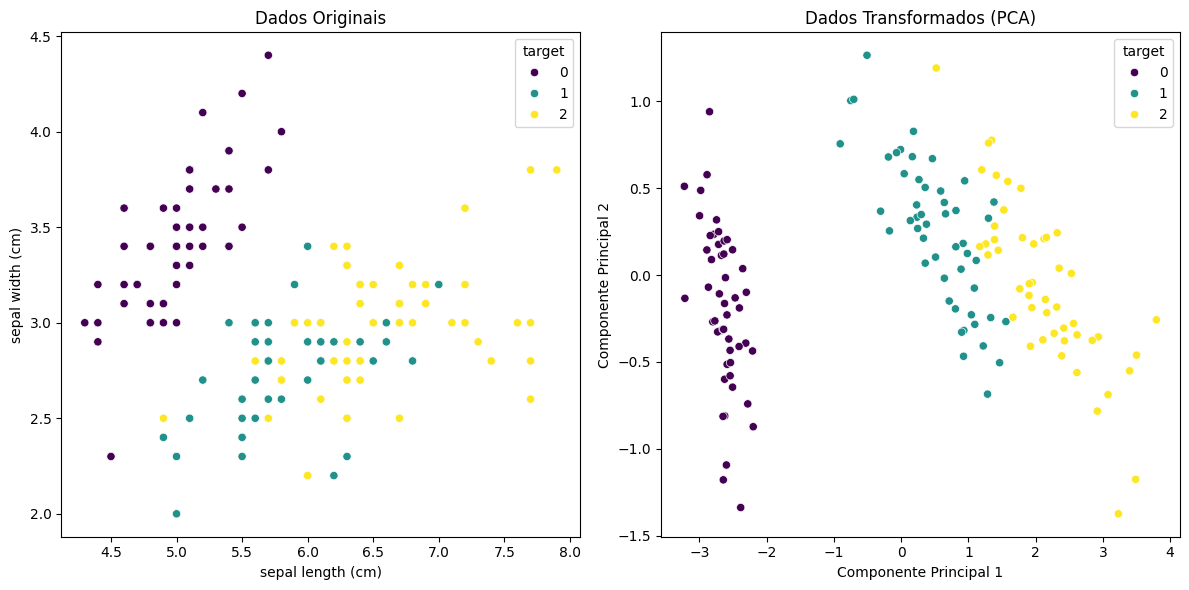

In [7]:
# Visualizar os dados originais
plt.figure(figsize=(12, 6))

# Gráfico original
plt.subplot(1, 2, 1)
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['target'], palette='viridis')
plt.title('Dados Originais')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Gráfico transformado
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'], palette='viridis')
plt.title('Dados Transformados (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()